<a href="https://colab.research.google.com/github/yms07/My-Project1/blob/main/RansomwareDetection_FPE_81Folders_ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import zipfile
import shutil


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 🔹 Step 2: ফোল্ডার পাথ সেট করো
zip_folder = "/content/drive/MyDrive/GovDocs1_Thesis"
plaintext_dir = "/content/plaintext_folder"
os.makedirs(plaintext_dir, exist_ok=True)



In [5]:
# 🔹 Step 3: কোন ফাইল টাইপ নিতে চাও
selected_types = [".csv", ".txt", ".doc", ".docx", ".ppt", ".pptx", ".xls", ".xlsx", ".html", ".c", ".cpp", ".jpg", ".pdf", ".zip"]

In [6]:
# 🔹 Step 4: সব zip ফাইল extract করে দরকারি ফাইল কপি করো
for zip_file in sorted(os.listdir(zip_folder)):
    if zip_file.endswith(".zip"):
        zip_path = os.path.join(zip_folder, zip_file)
        extract_path = "/content/temp_extracted"
        os.makedirs(extract_path, exist_ok=True)

        print(f"📦 Extracting {zip_file}...")

        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_path)

            count = 0
            for root, _, files in os.walk(extract_path):  # ✅ Recursively walk all folders
                for file in files:
                    ext = os.path.splitext(file)[1].lower()
                    if ext in selected_types:
                        src_path = os.path.join(root, file)
                        dst_path = os.path.join(plaintext_dir, file)
                        if not os.path.exists(dst_path):
                            shutil.copy(src_path, dst_path)
                            count += 1

            print(f"✅ Copied {count} valid files from {zip_file}")
            shutil.rmtree(extract_path)

        except Exception as e:
            print(f"❌ Error extracting {zip_file}: {e}")

📦 Extracting 000.zip...
✅ Copied 896 valid files from 000.zip
📦 Extracting 001.zip...
✅ Copied 916 valid files from 001.zip
📦 Extracting 002.zip...
✅ Copied 936 valid files from 002.zip
📦 Extracting 003.zip...
✅ Copied 954 valid files from 003.zip
📦 Extracting 004.zip...
✅ Copied 923 valid files from 004.zip
📦 Extracting 005.zip...
✅ Copied 939 valid files from 005.zip
📦 Extracting 006.zip...
✅ Copied 896 valid files from 006.zip
📦 Extracting 007.zip...
✅ Copied 895 valid files from 007.zip
📦 Extracting 008.zip...
✅ Copied 914 valid files from 008.zip
📦 Extracting 009.zip...
✅ Copied 922 valid files from 009.zip
📦 Extracting 010.zip...
✅ Copied 928 valid files from 010.zip
📦 Extracting 011.zip...
✅ Copied 925 valid files from 011.zip
📦 Extracting 012.zip...
✅ Copied 929 valid files from 012.zip
📦 Extracting 013.zip...
✅ Copied 885 valid files from 013.zip
📦 Extracting 014.zip...
✅ Copied 931 valid files from 014.zip
📦 Extracting 015.zip...
✅ Copied 922 valid files from 015.zip
📦 Extrac

In [7]:
print("📁 Total files in plaintext_folder:", len(os.listdir(plaintext_dir)))

📁 Total files in plaintext_folder: 55603


In [8]:
import os
import math
import pandas as pd

folder = "/content/plaintext_folder"

file_type_map = {
    ".csv": 1, ".txt": 2, ".doc": 3, ".docx": 4, ".ppt": 5, ".pptx": 6,
    ".xls": 7, ".xlsx": 8, ".html": 9, ".c": 10, ".cpp": 11, ".jpg": 12,
    ".pdf": 13, ".zip": 14
}

def calculate_entropy(filepath):
    try:
        with open(filepath, 'rb') as f:
            data = f.read()
        if len(data) == 0:
            return 0
        freq = [0] * 256
        for byte in data:
            freq[byte] += 1
        entropy = 0
        for f in freq:
            if f > 0:
                p = f / len(data)
                entropy -= p * math.log2(p)
        return round(entropy, 4)
    except:
        return 0

dataset = []
for file in os.listdir(folder):
    path = os.path.join(folder, file)
    ext = os.path.splitext(file)[1].lower()
    entropy = calculate_entropy(path)
    try:
        size = os.path.getsize(path) / 1_000_000  # MB
        mtime = os.path.getmtime(path)
        atime = os.path.getatime(path)
        ctime = os.path.getctime(path)
        ftype = file_type_map.get(ext, 0)
        label = 1  # plaintext
        dataset.append([entropy, size, mtime, atime, ctime, ftype, label])
    except:
        continue

df = pd.DataFrame(dataset, columns=["entropy", "size", "mtime", "atime", "ctime", "type", "label"])
csv_path = "/content/govdocs1_plaintext_dataset.csv"
df.to_csv(csv_path, index=False)

print(f"✅ Dataset created with {len(df)} records.")
df.head()

✅ Dataset created with 55603 records.


,entropy,size,mtime,atime,ctime,type,label
0,7.8157,0.122390,1.750782e+09,1.750782e+09,1.750782e+09,13,1
1,7.8734,0.270329,1.750782e+09,1.750782e+09,1.750782e+09,13,1
2,3.1361,0.433481,1.750782e+09,1.750782e+09,1.750782e+09,2,1
3,6.3381,0.032526,1.750782e+09,1.750782e+09,1.750782e+09,13,1
4,4.8905,0.043162,1.750782e+09,1.750782e+09,1.750782e+09,9,1


In [9]:
import shutil
shutil.copy(csv_path, "/content/drive/MyDrive/GovDocs1_Thesis/govdocs1_plaintext_dataset.csv")

'/content/drive/MyDrive/GovDocs1_Thesis/govdocs1_plaintext_dataset.csv'

In [10]:
import os
import shutil

plaintext_dir = "/content/plaintext_folder"
ciphertext_dir = "/content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder"

os.makedirs(ciphertext_dir, exist_ok=True)

# সব plaintext ফাইলকে Drive-এ কপি করো
for file in os.listdir(plaintext_dir):
    src = os.path.join(plaintext_dir, file)
    dst = os.path.join(ciphertext_dir, file)
    if not os.path.exists(dst):
        shutil.copy(src, dst)

print(f"✅ Total copied files to ciphertext_folder: {len(os.listdir(ciphertext_dir))}")

✅ Total copied files to ciphertext_folder: 55603


In [11]:
!pip install pyffx

  Preparing metadata (setup.py) ... done
  Created wheel for pyffx: filename=pyffx-0.3.0-py3-none-any.whl size=3712 sha256=3f13f08d2e36049eae1c3db4ce43f3bb2188a467cba74108ec93f04230f90814
  Stored in directory: /root/.cache/pip/wheels/59/06/e7/a4d0fca3029a763e3a1cb42b68c146cdca263fdf74961585b4
Successfully built pyffx


In [12]:
import os
import pyffx
import string
import time


ciphertext_dir = "/content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder"
safe_types = [".txt", ".csv", ".html", ".c", ".cpp"]
processed = 0
max_files = 3000  # 🔹 আপনি চাইলে এটা 500, 1000 বা 3000 করতে পারেন

# ✅ byte-টাইপ key দরকার pyffx এর জন্য
key = b"my_secret_key"
alphabet = string.printable

start_time = time.time()

def fpe_encrypt_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            data = f.read()

        # খুব ছোট বা খালি ডেটা skip
        if not data.strip() or len(data) < 10:
            return

        fpe = pyffx.String(key, alphabet=alphabet, length=len(data))
        encrypted_data = fpe.encrypt(data)

        with open(file_path, 'w', encoding='utf-8', errors='ignore') as f:
            f.write(encrypted_data)

    except Exception as e:
        print(f"❌ Encryption error: {file_path} | {e}")

# 🔁 Encrypt শুধু নির্দিষ্ট safe টাইপের এবং সীমিত সংখ্যক ফাইল
for file in os.listdir(ciphertext_dir):
    ext = os.path.splitext(file)[1].lower()
    if ext in safe_types:
        path = os.path.join(ciphertext_dir, file)
        fpe_encrypt_file(path)
        processed += 1
        if processed % 100 == 0:
            print(f"✅ Encrypted {processed} files...")
        if processed >= max_files:
            break

end_time = time.time()
elapsed = end_time - start_time
print(f"\n🔐 Done! Total {processed} files encrypted in {elapsed/60:.2f} minutes.")

❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/052348.html | non-alphabet character: '–'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/050124.html | non-alphabet character: '’'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/033426.txt | non-alphabet character: '�'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/002366.html | non-alphabet character: '\xa0'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/032319.html | non-alphabet character: '\xa0'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/008752.html | non-alphabet character: '–'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/024729.html | non-alphabet character: '»'
❌ Encryption error: /content/drive/MyDrive/GovDocs1_Thesis/ciphertext_folder/048087.txt | non-alphabet character: '\x15'
❌ Encryption error: /content/drive/MyDriv

In [13]:
import math
import pandas as pd

file_type_map = {
    ".csv": 1, ".txt": 2, ".doc": 3, ".docx": 4, ".ppt": 5, ".pptx": 6,
    ".xls": 7, ".xlsx": 8, ".html": 9, ".c": 10, ".cpp": 11, ".jpg": 12,
    ".pdf": 13, ".zip": 14
}

def calculate_entropy(filepath):
    try:
        with open(filepath, 'rb') as f:
            data = f.read()
        if len(data) == 0:
            return 0
        freq = [0] * 256
        for byte in data:
            freq[byte] += 1
        entropy = 0
        for f in freq:
            if f > 0:
                p = f / len(data)
                entropy -= p * math.log2(p)
        return round(entropy, 4)
    except:
        return 0

# Extract from ciphertext folder
dataset = []
for file in os.listdir(ciphertext_dir):
    path = os.path.join(ciphertext_dir, file)
    ext = os.path.splitext(file)[1].lower()
    entropy = calculate_entropy(path)
    try:
        size = os.path.getsize(path) / 1_000_000  # MB
        mtime = os.path.getmtime(path)
        atime = os.path.getatime(path)
        ctime = os.path.getctime(path)
        ftype = file_type_map.get(ext, 0)
        label = 0  # ciphertext
        dataset.append([entropy, size, mtime, atime, ctime, ftype, label])
    except:
        continue

df2 = pd.DataFrame(dataset, columns=["entropy", "size", "mtime", "atime", "ctime", "type", "label"])
csv2_path = "/content/govdocs1_ciphertext_dataset.csv"
df2.to_csv(csv2_path, index=False)

print(f"✅ Ciphertext dataset created with {len(df2)} records.")
df2.head()

✅ Ciphertext dataset created with 55603 records.


,entropy,size,mtime,atime,ctime,type,label
0,7.1951,2.912768,1.750778e+09,1.750778e+09,1.750791e+09,5,0
1,3.2581,0.031232,1.750778e+09,1.750778e+09,1.750791e+09,7,0
2,6.6425,0.057651,1.750786e+09,1.750778e+09,1.750791e+09,9,0
3,6.6426,0.051983,1.750786e+09,1.750778e+09,1.750791e+09,2,0
4,7.9981,5.014836,1.750778e+09,1.750778e+09,1.750791e+09,13,0


In [14]:
shutil.copy(csv2_path, "/content/drive/MyDrive/GovDocs1_Thesis/govdocs1_ciphertext_dataset.csv")

'/content/drive/MyDrive/GovDocs1_Thesis/govdocs1_ciphertext_dataset.csv'

In [15]:
import pandas as pd
from sklearn.utils import shuffle

# দুইটি dataset লোড করো
df1 = pd.read_csv("/content/govdocs1_plaintext_dataset.csv")
df2 = pd.read_csv("/content/govdocs1_ciphertext_dataset.csv")

# Merge করো
final_df = pd.concat([df1, df2], ignore_index=True)

# Shuffle করে মিশাও
final_df = shuffle(final_df).reset_index(drop=True)

# Final CSV ফাইল তৈরি
final_csv_path = "/content/final_dataset.csv"
final_df.to_csv(final_csv_path, index=False)

print(f"✅ Final dataset created with {len(final_df)} total records.")
final_df.head()

✅ Final dataset created with 111206 total records.


,entropy,size,mtime,atime,ctime,type,label
0,7.8971,1.060153,1.750783e+09,1.750785e+09,1.750783e+09,13,1
1,4.8198,0.003421,1.750782e+09,1.750782e+09,1.750782e+09,2,1
2,1.3919,0.024576,1.750786e+09,1.750786e+09,1.750794e+09,3,0
3,6.6672,0.259072,1.750782e+09,1.750783e+09,1.750782e+09,3,1
4,7.9002,0.014749,1.750783e+09,1.750785e+09,1.750783e+09,12,1


In [16]:
import shutil
shutil.copy(final_csv_path, "/content/drive/MyDrive/GovDocs1_Thesis/final_dataset.csv")

'/content/drive/MyDrive/GovDocs1_Thesis/final_dataset.csv'


🔍 K-Fold Training: KNN


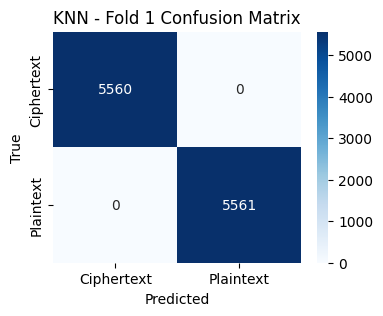

✅ Fold 1 Accuracy: 1.0000


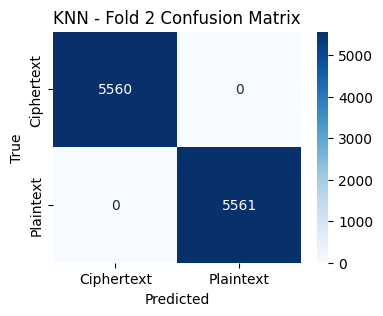

✅ Fold 2 Accuracy: 1.0000


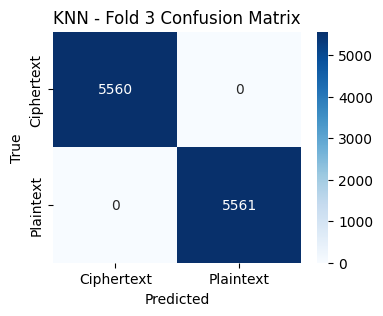

✅ Fold 3 Accuracy: 1.0000


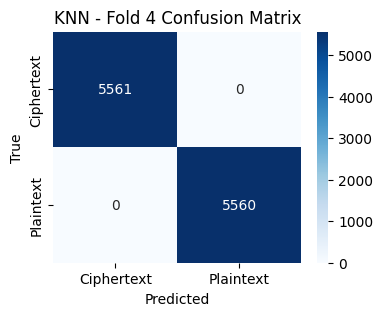

✅ Fold 4 Accuracy: 1.0000


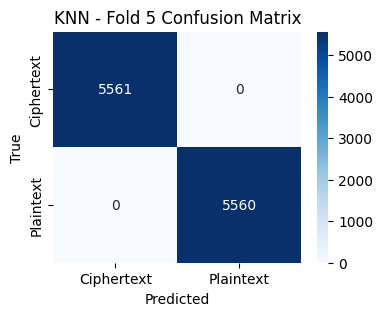

✅ Fold 5 Accuracy: 1.0000


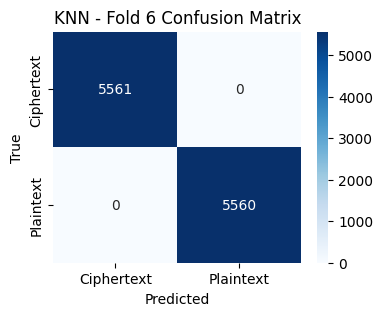

✅ Fold 6 Accuracy: 1.0000


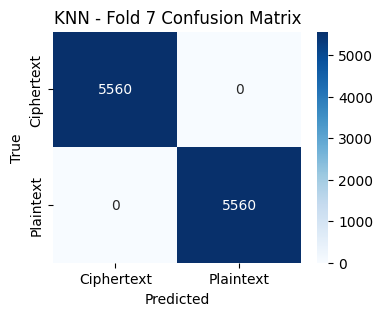

✅ Fold 7 Accuracy: 1.0000


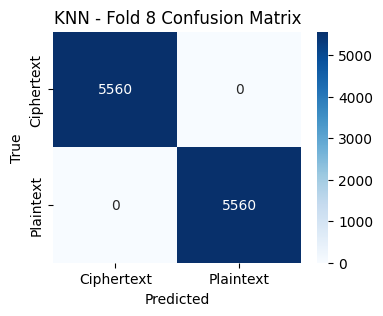

✅ Fold 8 Accuracy: 1.0000


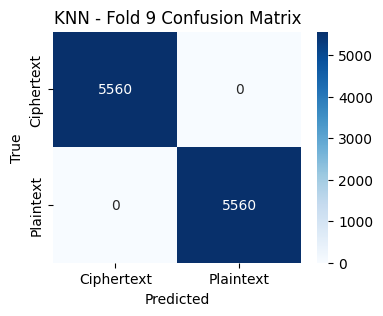

✅ Fold 9 Accuracy: 1.0000


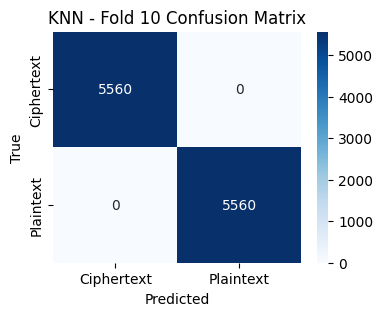

✅ Fold 10 Accuracy: 1.0000

📊 Average Accuracy for KNN: 1.0000
📊 Average F1-score for KNN: 1.0000

🔍 K-Fold Training: Logistic Regression


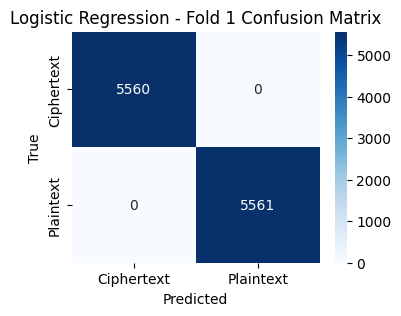

✅ Fold 1 Accuracy: 1.0000


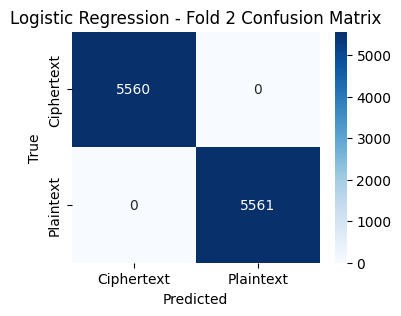

✅ Fold 2 Accuracy: 1.0000


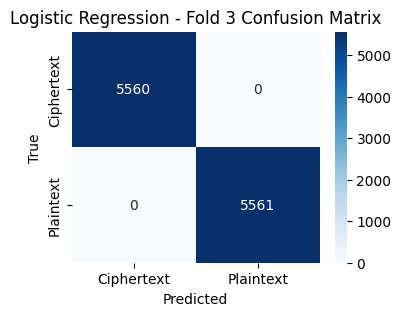

✅ Fold 3 Accuracy: 1.0000


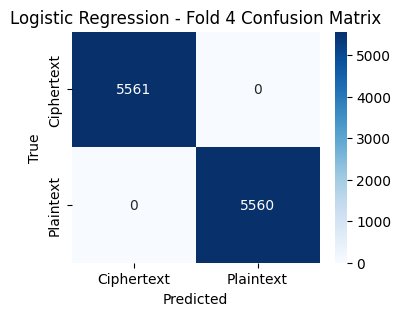

✅ Fold 4 Accuracy: 1.0000


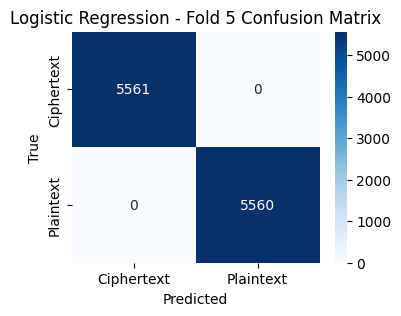

✅ Fold 5 Accuracy: 1.0000


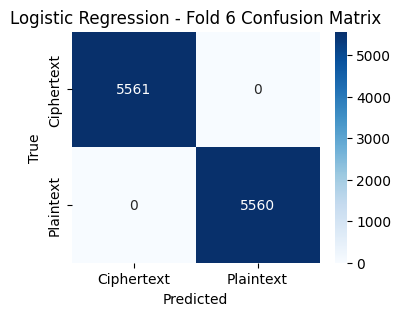

✅ Fold 6 Accuracy: 1.0000


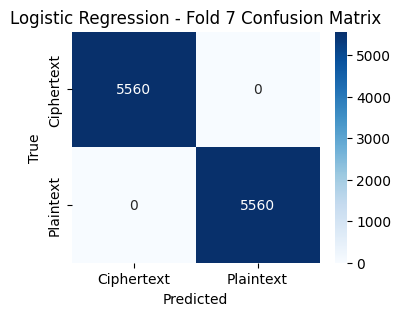

✅ Fold 7 Accuracy: 1.0000


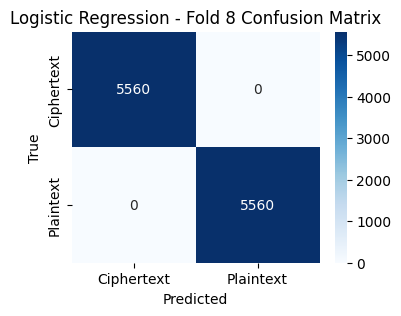

✅ Fold 8 Accuracy: 1.0000


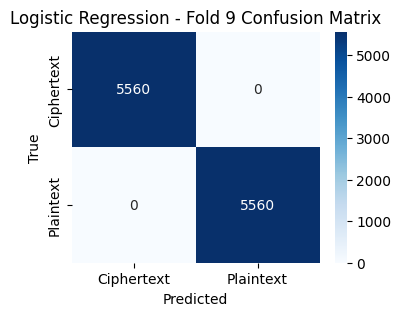

✅ Fold 9 Accuracy: 1.0000


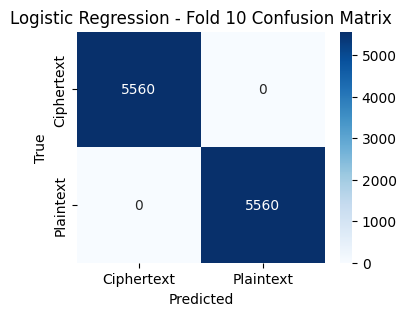

✅ Fold 10 Accuracy: 1.0000

📊 Average Accuracy for Logistic Regression: 1.0000
📊 Average F1-score for Logistic Regression: 1.0000

🔍 K-Fold Training: Decision Tree


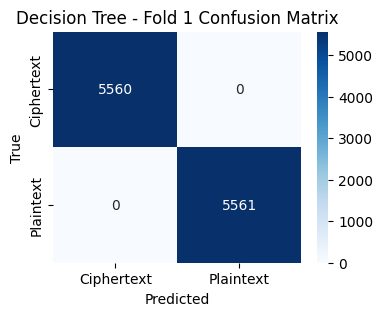

✅ Fold 1 Accuracy: 1.0000


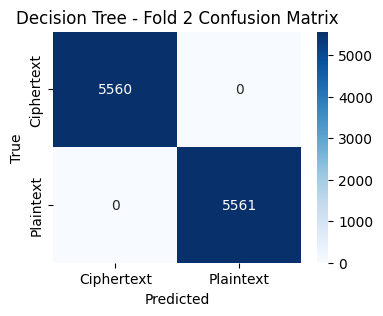

✅ Fold 2 Accuracy: 1.0000


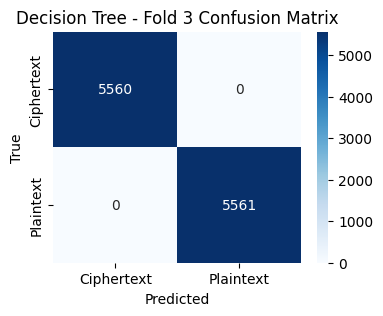

✅ Fold 3 Accuracy: 1.0000


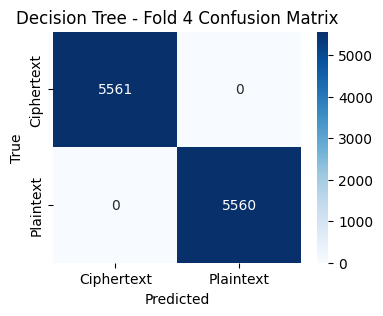

✅ Fold 4 Accuracy: 1.0000


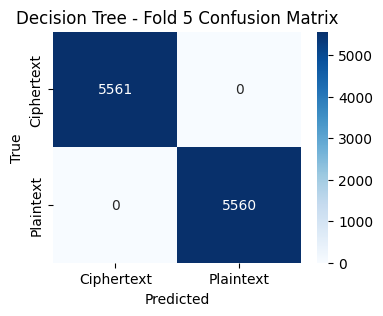

✅ Fold 5 Accuracy: 1.0000


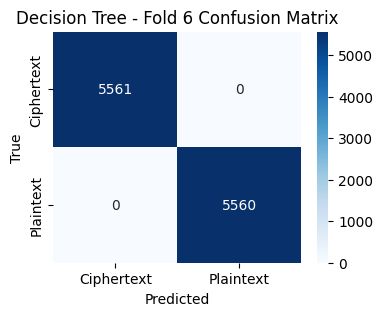

✅ Fold 6 Accuracy: 1.0000


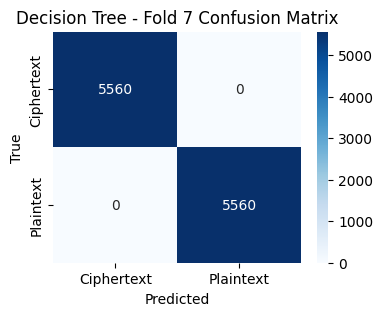

✅ Fold 7 Accuracy: 1.0000


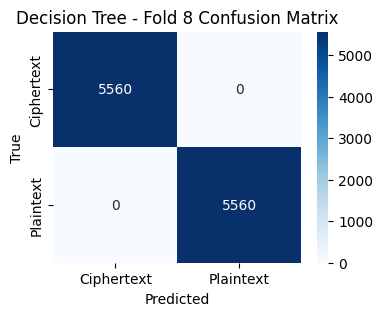

✅ Fold 8 Accuracy: 1.0000


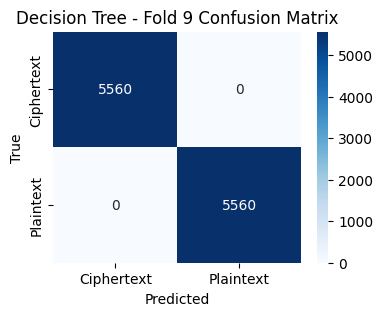

✅ Fold 9 Accuracy: 1.0000


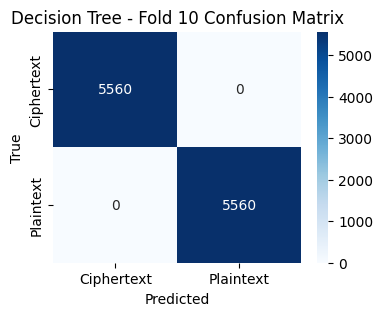

✅ Fold 10 Accuracy: 1.0000

📊 Average Accuracy for Decision Tree: 1.0000
📊 Average F1-score for Decision Tree: 1.0000

🔍 K-Fold Training: Random Forest


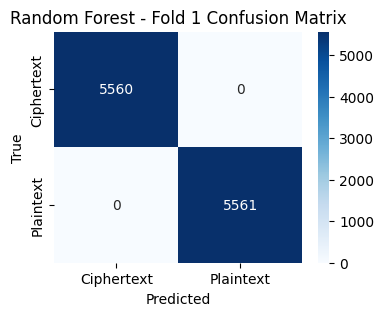

✅ Fold 1 Accuracy: 1.0000


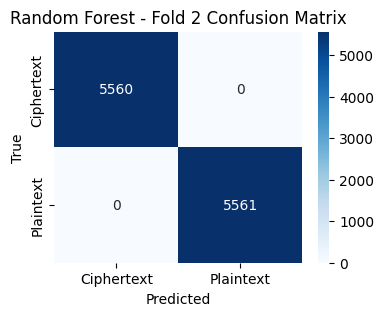

✅ Fold 2 Accuracy: 1.0000


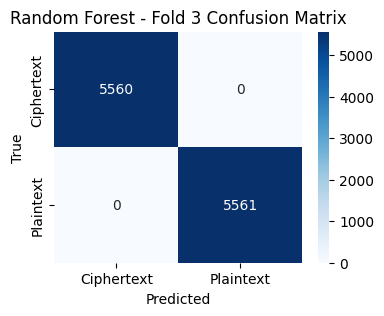

✅ Fold 3 Accuracy: 1.0000


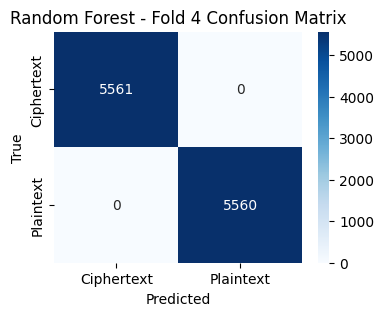

✅ Fold 4 Accuracy: 1.0000


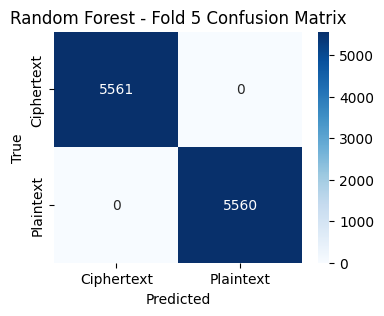

✅ Fold 5 Accuracy: 1.0000


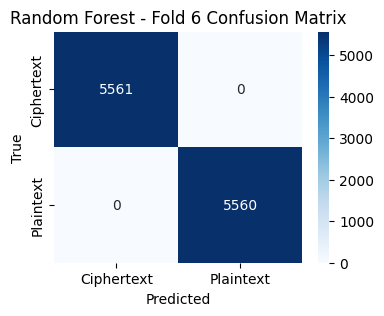

✅ Fold 6 Accuracy: 1.0000


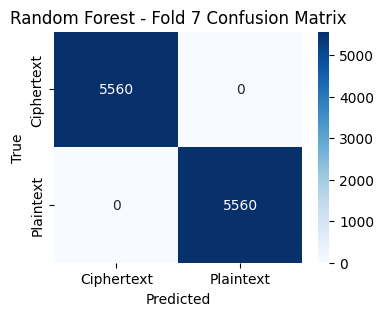

✅ Fold 7 Accuracy: 1.0000


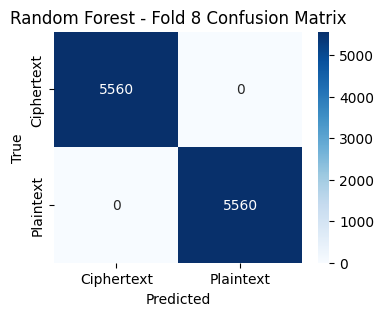

✅ Fold 8 Accuracy: 1.0000


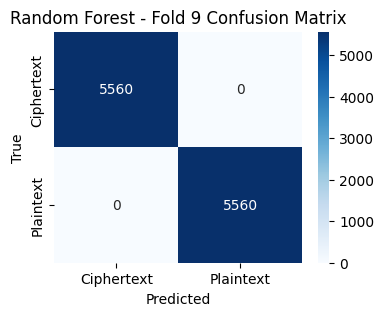

✅ Fold 9 Accuracy: 1.0000


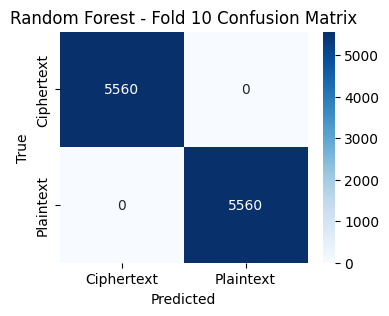

✅ Fold 10 Accuracy: 1.0000

📊 Average Accuracy for Random Forest: 1.0000
📊 Average F1-score for Random Forest: 1.0000

🔍 K-Fold Training: Gradient Boosting


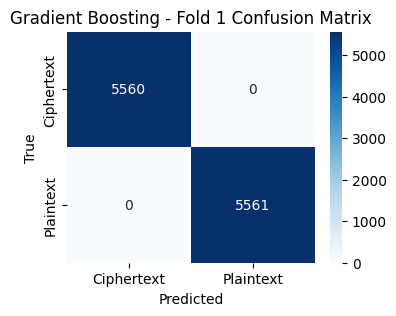

✅ Fold 1 Accuracy: 1.0000


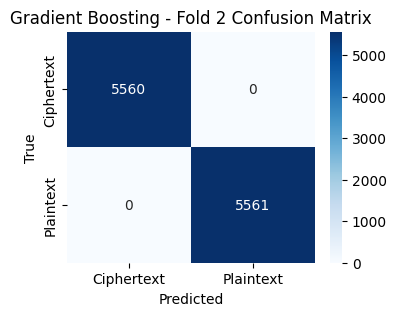

✅ Fold 2 Accuracy: 1.0000


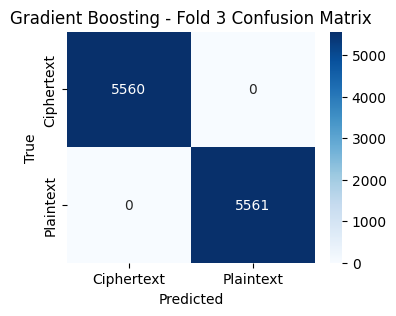

✅ Fold 3 Accuracy: 1.0000


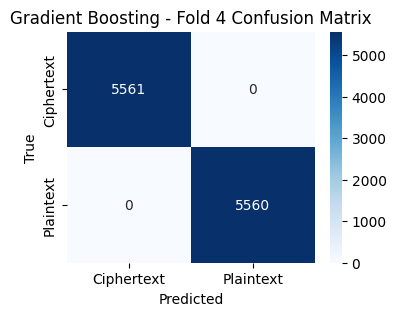

✅ Fold 4 Accuracy: 1.0000


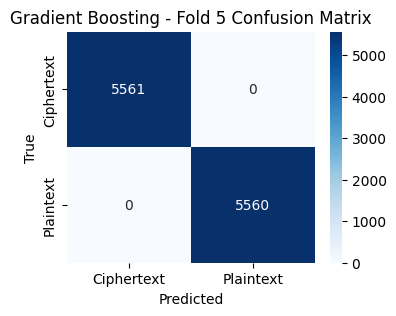

✅ Fold 5 Accuracy: 1.0000


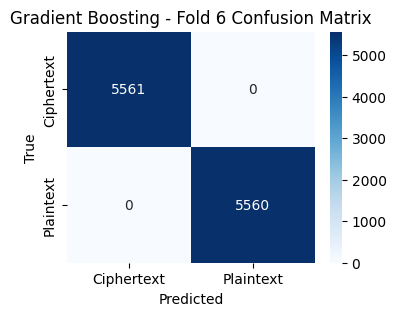

✅ Fold 6 Accuracy: 1.0000


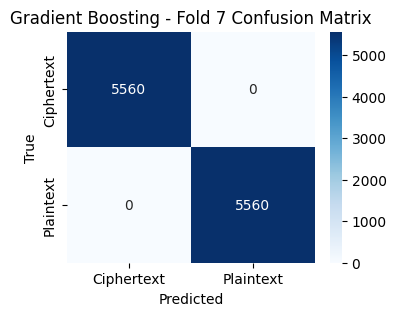

✅ Fold 7 Accuracy: 1.0000


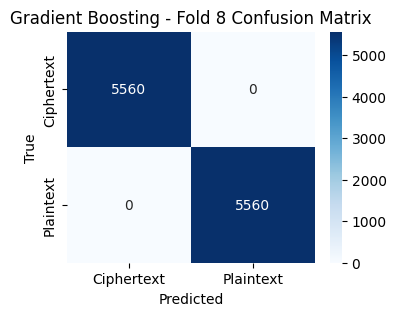

✅ Fold 8 Accuracy: 1.0000


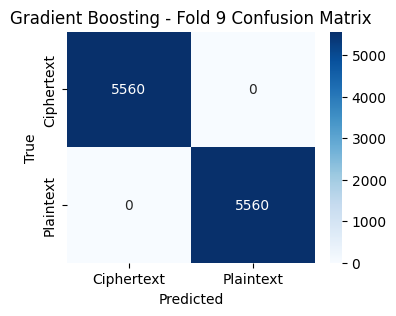

✅ Fold 9 Accuracy: 1.0000


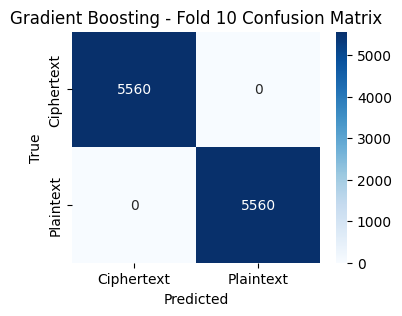

✅ Fold 10 Accuracy: 1.0000

📊 Average Accuracy for Gradient Boosting: 1.0000
📊 Average F1-score for Gradient Boosting: 1.0000

🔍 K-Fold Training: SVM


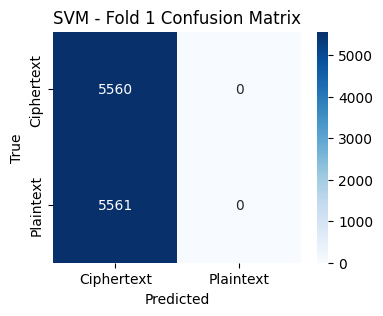

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Fold 1 Accuracy: 0.5000


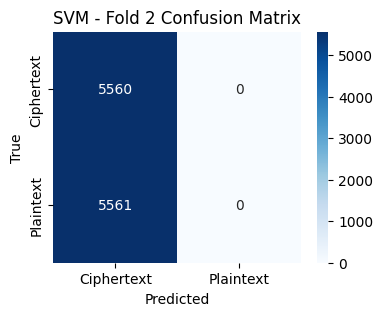

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Fold 2 Accuracy: 0.5000


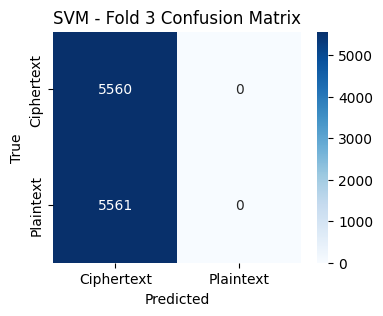

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Fold 3 Accuracy: 0.5000


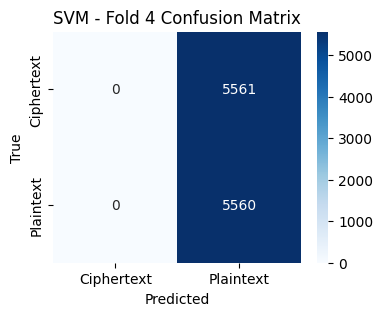

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Fold 4 Accuracy: 0.5000


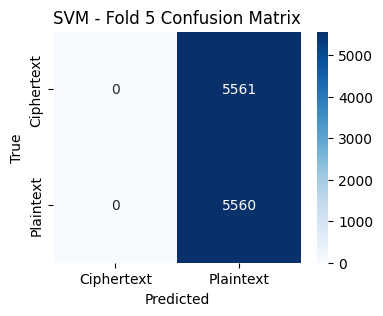

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Fold 5 Accuracy: 0.5000


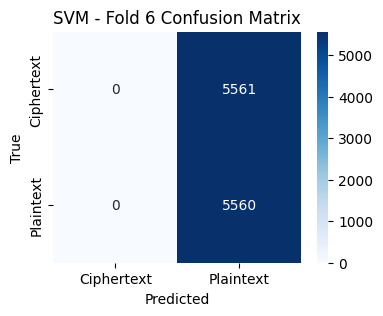

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Fold 6 Accuracy: 0.5000


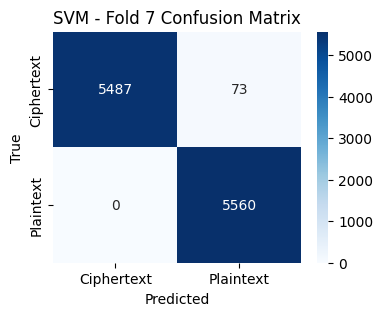

✅ Fold 7 Accuracy: 0.9934


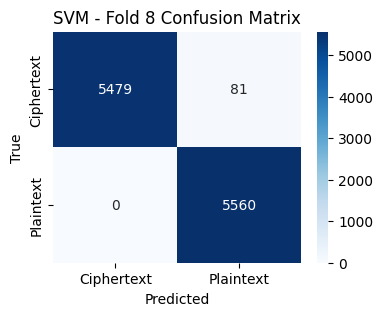

✅ Fold 8 Accuracy: 0.9927


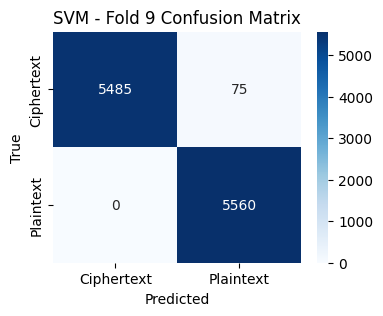

✅ Fold 9 Accuracy: 0.9933


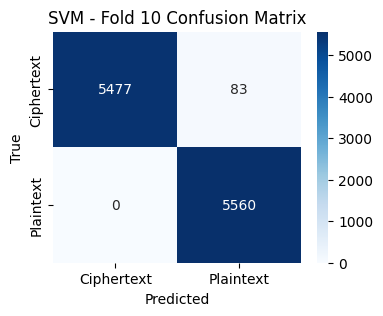

✅ Fold 10 Accuracy: 0.9925

📊 Average Accuracy for SVM: 0.6972
📊 Average F1-score for SVM: 0.5972

🔍 K-Fold Training: MLP


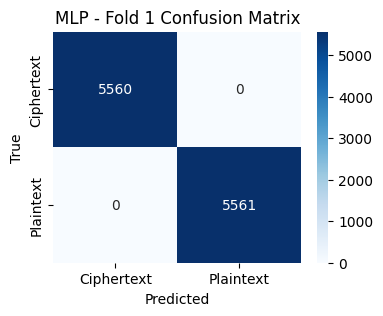

✅ Fold 1 Accuracy: 1.0000


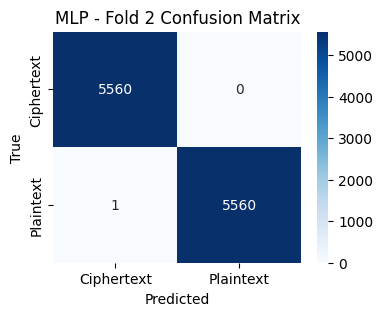

✅ Fold 2 Accuracy: 0.9999


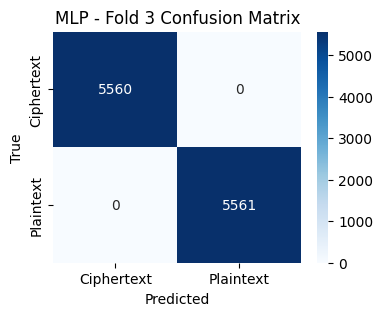

✅ Fold 3 Accuracy: 1.0000


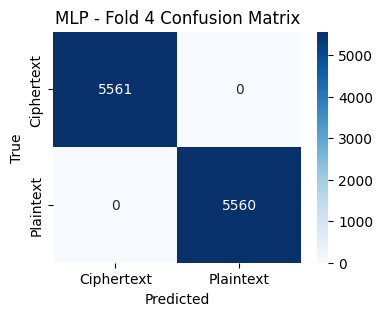

✅ Fold 4 Accuracy: 1.0000


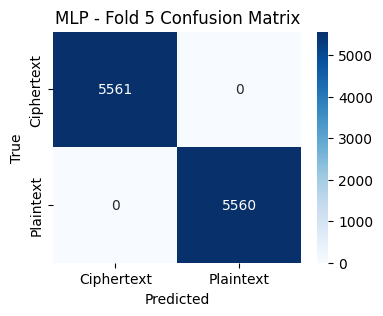

✅ Fold 5 Accuracy: 1.0000


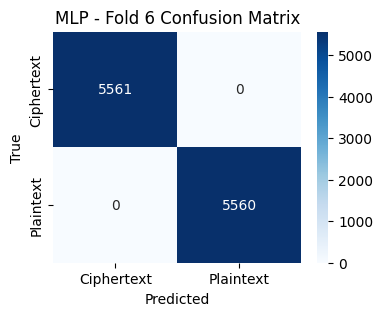

✅ Fold 6 Accuracy: 1.0000


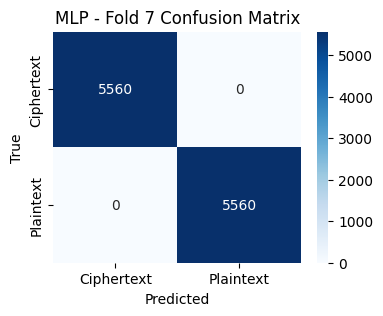

✅ Fold 7 Accuracy: 1.0000


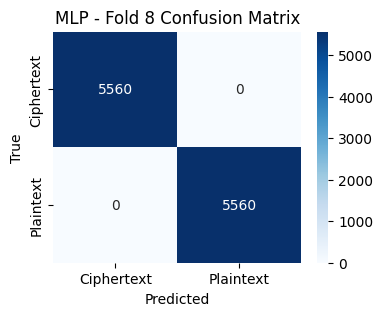

✅ Fold 8 Accuracy: 1.0000


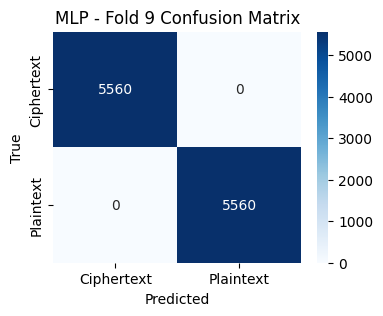

✅ Fold 9 Accuracy: 1.0000


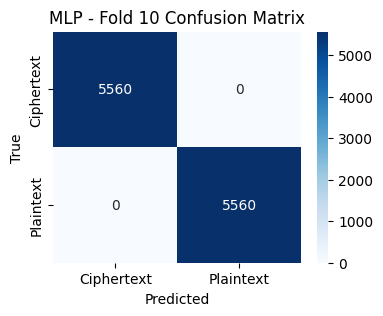

✅ Fold 10 Accuracy: 1.0000

📊 Average Accuracy for MLP: 1.0000
📊 Average F1-score for MLP: 1.0000


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset লোড
df = pd.read_csv("/content/final_dataset.csv")
X = df[["entropy", "size", "mtime", "atime", "ctime", "type"]]
y = df["label"]

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 K-Fold CV সেটআপ
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)



# ৭টি মডেল define
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),



# ✅ Updated MLP with StandardScaler using Pipeline
    "MLP": Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, activation='relu', solver='adam'))
    ])
}
# মডেলগুলো train এবং evaluate করো
#results = {}
#for name, model in models.items():
    #print(f"\n🔍 Training: {name}")
    #model.fit(X_train, y_train)
    #y_pred = model.predict(X_test)
    #acc = accuracy_score(y_test, y_pred)
    #print(f"✅ Accuracy: {acc:.4f}")
    #print(classification_report(y_test, y_pred))
    #results[name] = acc

# 🔁 প্রতিটি মডেলের জন্য K-Fold চালাও
for name, model in models.items():
    print(f"\n🔍 K-Fold Training: {name}")

    fold = 1
    acc_scores = []
    f1_scores = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # ✅ Confusion matrix দেখাও প্রতিটি ফোল্ডে
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Ciphertext", "Plaintext"],
                    yticklabels=["Ciphertext", "Plaintext"])
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title(f"{name} - Fold {fold} Confusion Matrix")
        plt.show()

        acc = accuracy_score(y_test, y_pred)
        acc_scores.append(acc)

        report = classification_report(y_test, y_pred, output_dict=True)
        f1_scores.append(report['weighted avg']['f1-score'])

        print(f"✅ Fold {fold} Accuracy: {acc:.4f}")
        fold += 1

    print(f"\n📊 Average Accuracy for {name}: {np.mean(acc_scores):.4f}")
    print(f"📊 Average F1-score for {name}: {np.mean(f1_scores):.4f}")